In [ ]:
import pandas as pd
cabrides_df=pd.read_csv("cab_rides.csv")
cabrides_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1.543710e+12,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1.543710e+12,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1.543710e+12,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1.543710e+12,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [ ]:
cabrides_df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [ ]:
cabrides_df.dropna(inplace=True)

In [ ]:
cabrides_df.isnull().sum().sum()

0

In [ ]:
num_duplicates_cabrides = cabrides_df.duplicated().sum()
print(f"Number of duplicates in cab_rides dataset={num_duplicates_cabrides}")

Number of duplicates in cab_rides dataset=0


In [ ]:
import datetime

# Convert timestamp to datetime
cabrides_df['timestamp'] = pd.to_datetime(cabrides_df['time_stamp'] / 1000, unit='s')

# Extract useful time-based features
cabrides_df['hour'] = cabrides_df['timestamp'].dt.hour
cabrides_df['day'] = cabrides_df['timestamp'].dt.day
cabrides_df['weekday'] = cabrides_df['timestamp'].dt.weekday

# Define peak hours (adjust if needed)
peak_hours = list(range(7, 10)) + list(range(16, 20))
cabrides_df['is_peak_hour'] = cabrides_df['hour'].isin(peak_hours).astype(int)

cabrides_df[['timestamp', 'hour', 'day', 'weekday', 'is_peak_hour']].head()

,timestamp,hour,day,weekday,is_peak_hour
0,2018-12-16 08:46:40,8,16,6,1
1,2018-11-27 00:53:20,0,27,1,0
2,2018-11-28 01:53:20,1,28,2,0
3,2018-11-30 03:53:20,3,30,4,0
4,2018-11-29 02:53:20,2,29,3,0


In [ ]:
cabrides_df = pd.get_dummies(cabrides_df, columns=['cab_type', 'name', 'source', 'destination'], drop_first=True)
print("One-Hot Encoding applied!")
cabrides_df

One-Hot Encoding applied!


,distance,time_stamp,price,surge_multiplier,id,product_id,timestamp,hour,day,weekday,...,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0.44,1.544950e+12,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,2018-12-16 08:46:40,8,16,6,...,False,False,False,False,False,True,False,False,False,False
1,0.44,1.543280e+12,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,2018-11-27 00:53:20,0,27,1,...,False,False,False,False,False,True,False,False,False,False
2,0.44,1.543370e+12,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,2018-11-28 01:53:20,1,28,2,...,False,False,False,False,False,True,False,False,False,False
3,0.44,1.543550e+12,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,2018-11-30 03:53:20,3,30,4,...,False,False,False,False,False,True,False,False,False,False
4,0.44,1.543460e+12,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,2018-11-29 02:53:20,2,29,3,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.543710e+12,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False
693066,1.00,1.543710e+12,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False
693067,1.00,1.543710e+12,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False
693069,1.00,1.543710e+12,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cabrides_df[['distance']] = scaler.fit_transform(cabrides_df[['distance']])
cabrides_df[['surge_multiplier']] = scaler.fit_transform(cabrides_df[['surge_multiplier']])

print("Distance feature normalized using Min-Max Scaling!")
cabrides_df

Distance feature normalized using Min-Max Scaling!


,distance,time_stamp,price,surge_multiplier,id,product_id,timestamp,hour,day,weekday,...,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0.053571,1.544950e+12,5.0,0.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,2018-12-16 08:46:40,8,16,6,...,False,False,False,False,False,True,False,False,False,False
1,0.053571,1.543280e+12,11.0,0.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,2018-11-27 00:53:20,0,27,1,...,False,False,False,False,False,True,False,False,False,False
2,0.053571,1.543370e+12,7.0,0.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,2018-11-28 01:53:20,1,28,2,...,False,False,False,False,False,True,False,False,False,False
3,0.053571,1.543550e+12,26.0,0.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,2018-11-30 03:53:20,3,30,4,...,False,False,False,False,False,True,False,False,False,False
4,0.053571,1.543460e+12,9.0,0.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,2018-11-29 02:53:20,2,29,3,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,0.125000,1.543710e+12,9.5,0.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False
693066,0.125000,1.543710e+12,13.0,0.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False
693067,0.125000,1.543710e+12,9.5,0.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False
693069,0.125000,1.543710e+12,27.0,0.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False


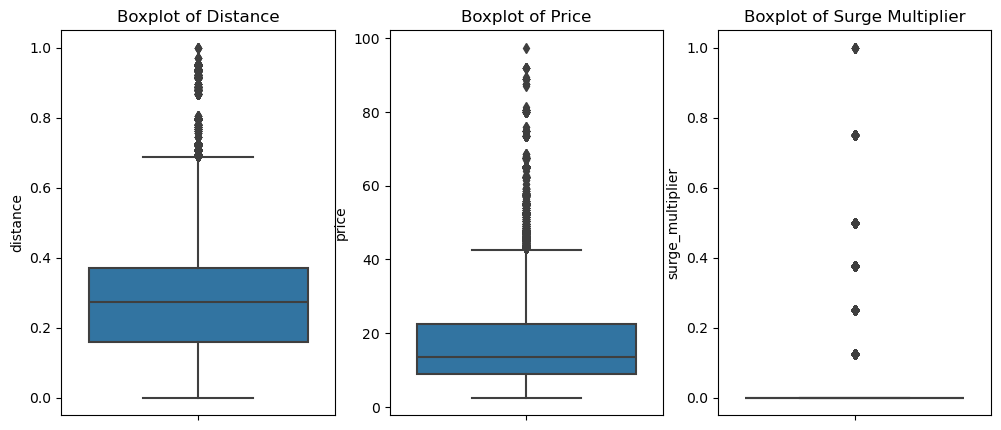

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for 'distance', 'price' and 'surge_multiplier'
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(y=cabrides_df['distance'], ax=ax[0])
ax[0].set_title('Boxplot of Distance')

sns.boxplot(y=cabrides_df['price'], ax=ax[1])
ax[1].set_title('Boxplot of Price')

sns.boxplot(y=cabrides_df['surge_multiplier'], ax=ax[2])
ax[2].set_title('Boxplot of Surge Multiplier')

plt.show()

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for 'price' and 'distance'
cabrides_df = remove_outliers_iqr(cabrides_df, 'price')
cabrides_df = remove_outliers_iqr(cabrides_df, 'distance')

# Check new dataset shape
print(f"New dataset shape after outlier removal: {cabrides_df.shape}")

# Save cleaned dataset
cabrides_df

New dataset shape after outlier removal: (625229, 45)


,distance,time_stamp,price,surge_multiplier,id,product_id,timestamp,hour,day,weekday,...,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0.053571,1.544950e+12,5.0,0.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,2018-12-16 08:46:40,8,16,6,...,False,False,False,False,False,True,False,False,False,False
1,0.053571,1.543280e+12,11.0,0.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,2018-11-27 00:53:20,0,27,1,...,False,False,False,False,False,True,False,False,False,False
2,0.053571,1.543370e+12,7.0,0.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,2018-11-28 01:53:20,1,28,2,...,False,False,False,False,False,True,False,False,False,False
3,0.053571,1.543550e+12,26.0,0.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,2018-11-30 03:53:20,3,30,4,...,False,False,False,False,False,True,False,False,False,False
4,0.053571,1.543460e+12,9.0,0.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,2018-11-29 02:53:20,2,29,3,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,0.125000,1.543710e+12,9.5,0.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False
693066,0.125000,1.543710e+12,13.0,0.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False
693067,0.125000,1.543710e+12,9.5,0.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False
693069,0.125000,1.543710e+12,27.0,0.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,2018-12-02 00:20:00,0,2,6,...,False,False,False,False,True,False,False,False,False,False


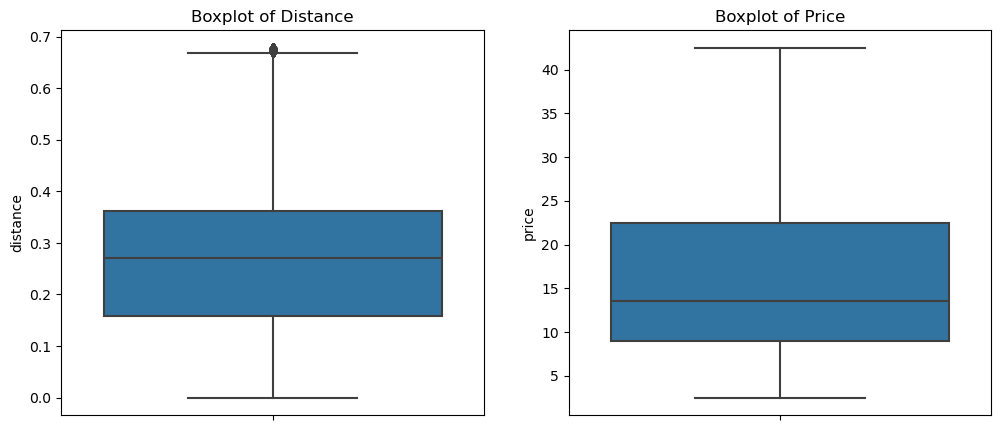

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for 'distance', 'price' and 'surge_multiplier'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=cabrides_df['distance'], ax=ax[0])
ax[0].set_title('Boxplot of Distance')

sns.boxplot(y=cabrides_df['price'], ax=ax[1])
ax[1].set_title('Boxplot of Price')

plt.show()

C:\Users\Ruthveek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ruthveek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


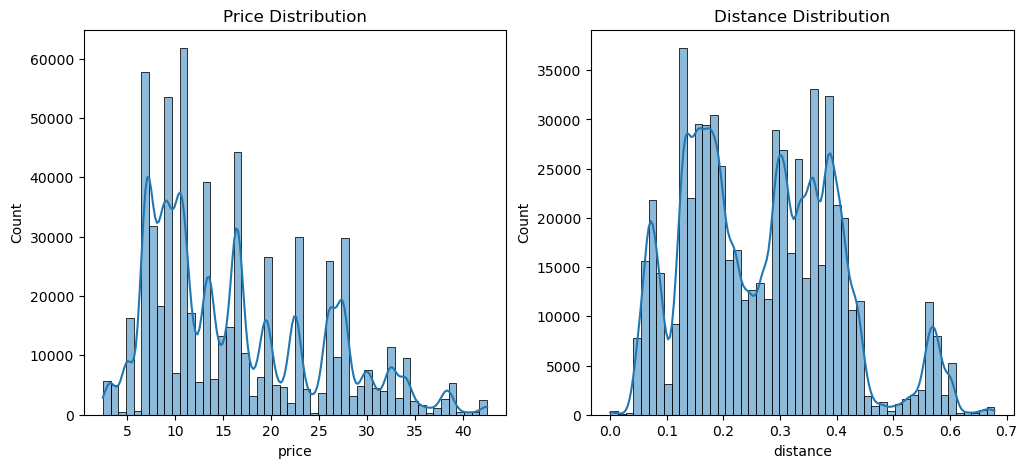

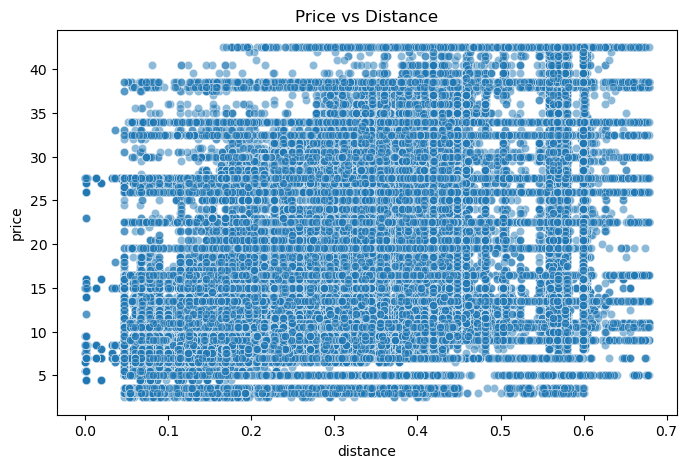

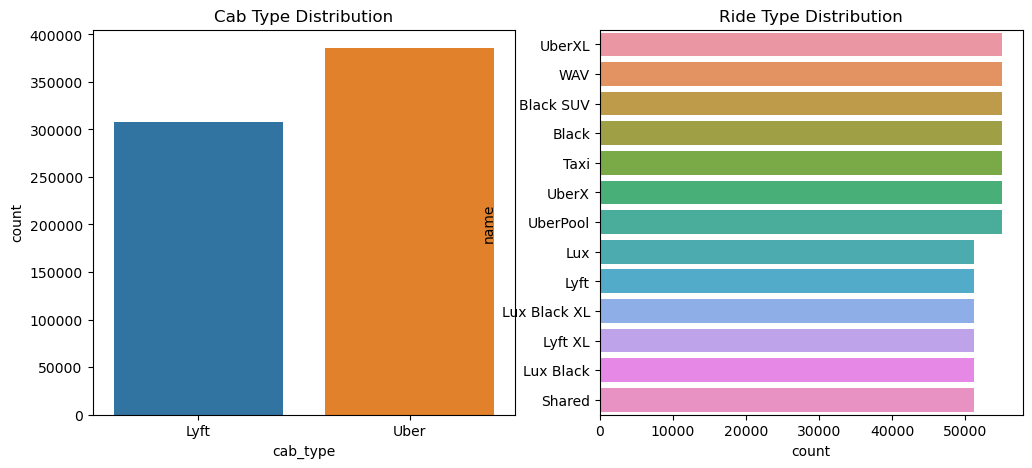

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of price and distance
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(cabrides_df['price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Price Distribution")
sns.histplot(cabrides_df['distance'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distance Distribution")
plt.show()

# Price vs Distance scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='distance', y='price', data=cabrides_df, alpha=0.5)
plt.title("Price vs Distance")
plt.show()

# Count plots for categorical features
df=pd.read_csv('cab_rides.csv')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='cab_type', data=df, ax=axes[0])
axes[0].set_title("Cab Type Distribution")
sns.countplot(y='name', data=df, ax=axes[1], order=df['name'].value_counts().index)
axes[1].set_title("Ride Type Distribution")
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

# Drop irrelevant columns
columns_to_drop = ['timestamp', 'time_stamp']  # Drop timestamp-related columns
cabrides_df = cabrides_df.drop(columns=columns_to_drop, errors='ignore')

# Selecting features (excluding 'price', 'id', and 'product_id')
X = cabrides_df.drop(columns=['price', 'id', 'product_id'])
y = cabrides_df['price']

# Splitting data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set: X_train: (500183, 40), y_train: (500183,)
Testing set: X_test: (125046, 40), y_test: (125046,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:4f}")

Linear Regression Performance:
RMSE: 2.1759
R² Score: 0.937804


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest Performance:\nRMSE: {rmse_rf:.4f}\nR² Score: {r2_rf:.4f}")

Random Forest Performance:
RMSE: 1.6958
R² Score: 0.9622


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Performance:\nRMSE: {rmse_xgb:.4f}\nR² Score: {r2_xgb:.4f}")

XGBoost Performance:
RMSE: 1.6229
R² Score: 0.9654


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize CatBoost model
catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Predictions
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate performance
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost Performance:\nRMSE: {rmse_catboost:.4f}\nR² Score: {r2_catboost:.4f}")

CatBoost Performance:
RMSE: 1.5732
R² Score: 0.9675


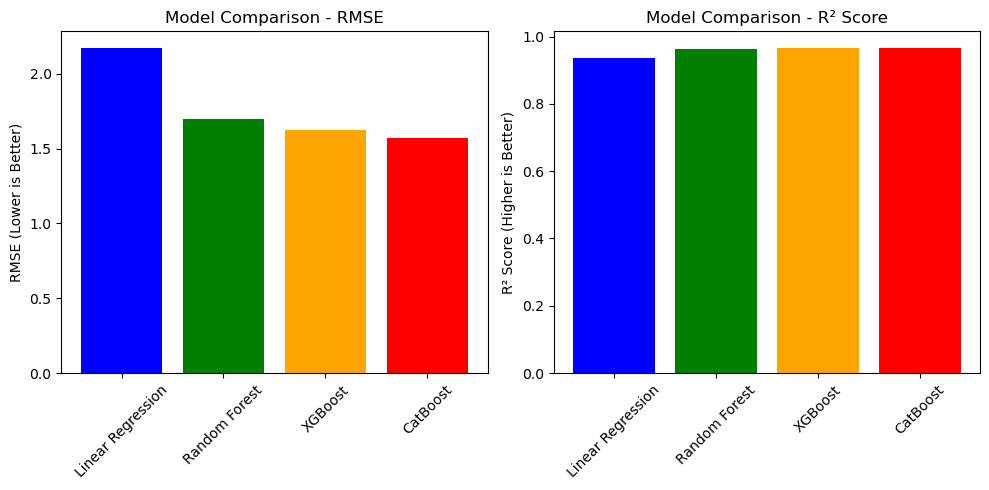

🏆 Best Performing Model: CatBoost (Lowest RMSE: 1.5731530930276827, Highest R²: 0.9674896948113603)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'CatBoost']

# RMSE and R² scores
rmse_values = [rmse_lr, rmse_rf, rmse_xgb, rmse_catboost]
r2_scores = [r2_lr, r2_rf, r2_xgb, r2_catboost]

# Plot RMSE comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('RMSE (Lower is Better)')
plt.title('Model Comparison - RMSE')
plt.xticks(rotation=45)

# Plot R² Score comparison
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('R² Score (Higher is Better)')
plt.title('Model Comparison - R² Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Best model determination
best_model = models[np.argmin(rmse_values)]
print(f"🏆 Best Performing Model: {best_model} (Lowest RMSE: {min(rmse_values)}, Highest R²: {max(r2_scores)})")

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define CatBoost model
catboost_model = CatBoostRegressor(verbose=0)

# Define parameter grid for tuning
param_grid = {
    'iterations': [500, 700],  # Reduced range
    'depth': [6, 8, 10],  # Moderate depth
    'learning_rate': [0.05, 0.1, 0.2],  # Common values
    'l2_leaf_reg': [3, 5, 7]  # Regularization strength
}

# RandomizedSearchCV: Fast Hyperparameter Tuning
random_search = RandomizedSearchCV(
    catboost_model, param_distributions=param_grid,
    n_iter=5,  # Searches only 5 random combinations
    cv=3,  # 3-Fold Cross Validation
    scoring='neg_root_mean_squared_error',  # Optimizing for RMSE
    n_jobs=-1,  # Parallel processing
    random_state=42  # Reproducibility
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model
best_catboost = random_search.best_estimator_

In [ ]:
# Display the best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate on the test set
y_pred = best_catboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Compute MSE
rmse = np.sqrt(mse)  # Take the square root
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Best Hyperparameters: {'learning_rate': 0.2, 'l2_leaf_reg': 7, 'iterations': 500, 'depth': 10}
RMSE: 1.5286
R² Score: 0.9693


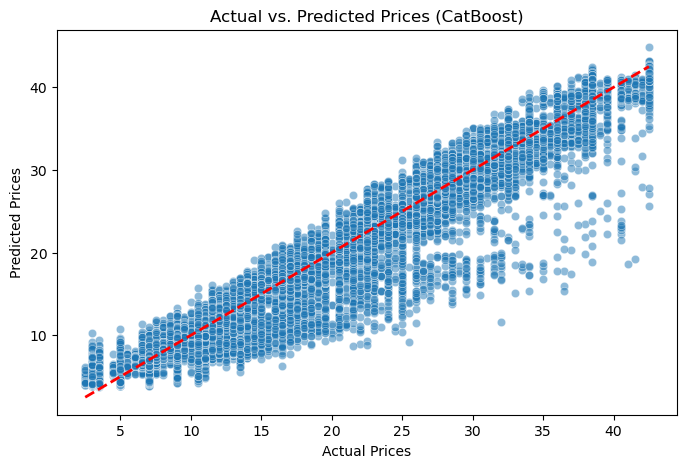

C:\Users\Ruthveek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


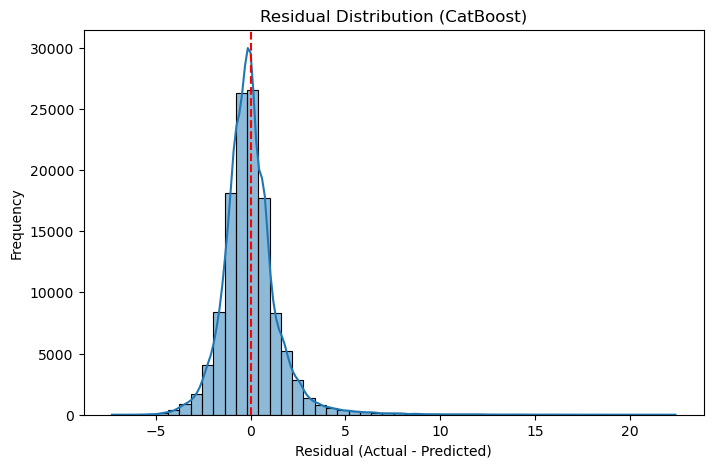

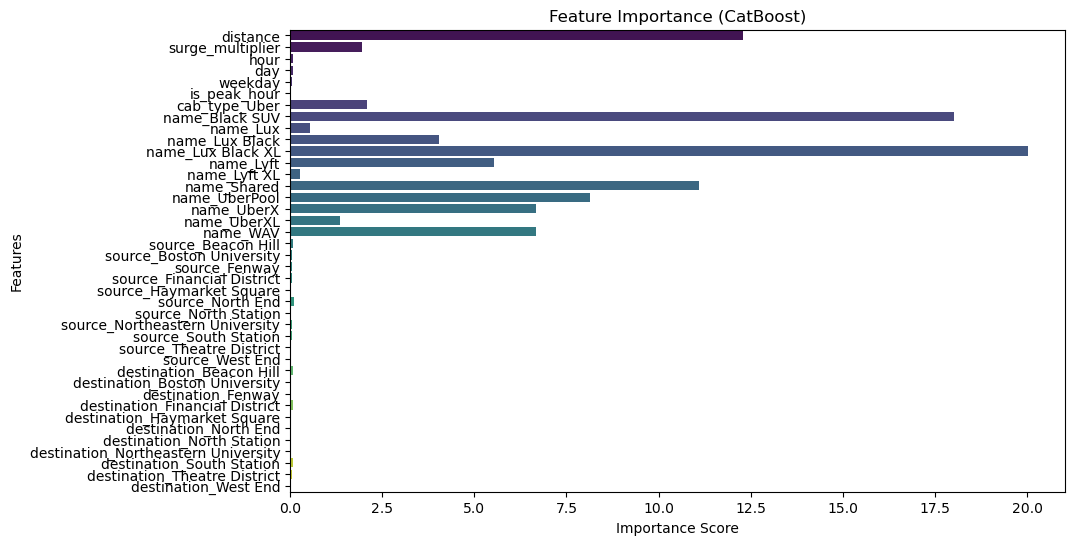

In [ ]:
# ✅ 1. Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)  # Perfect line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (CatBoost)")
plt.show()

# ✅ 2. Residual Plot (Errors)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='dashed')  # Centered at 0
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (CatBoost)")
plt.show()

# ✅ 3. Feature Importance Plot
feature_importance = best_catboost.get_feature_importance()
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (CatBoost)")
plt.show()

In [ ]:
# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display sorted feature importances
print(feature_importance_df)

                                Feature  Importance
10                    name_Lux Black XL   20.026928
7                        name_Black SUV   18.029179
0                              distance   12.295721
13                          name_Shared   11.109922
14                        name_UberPool    8.150871
15                           name_UberX    6.674312
17                             name_WAV    6.663592
11                            name_Lyft    5.544407
9                        name_Lux Black    4.049137
6                         cab_type_Uber    2.077674
1                      surge_multiplier    1.961457
16                          name_UberXL    1.363969
8                              name_Lux    0.538931
12                         name_Lyft XL    0.261095
23                     source_North End    0.104518
29              destination_Beacon Hill    0.088556
37            destination_South Station    0.084160
2                                  hour    0.081664
32       des

In [ ]:
import joblib

# Save the trained CatBoost model
joblib.dump(best_catboost, "catboost_fare_model.pkl")

print("Model saved successfully!")

Model saved successfully!


In [ ]:
cabrides_df.columns

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostRegressor

# Load dataset
df = pd.read_csv("cab_rides.csv")

# Extract unique values
unique_cab_types = df['name'].unique().tolist()
unique_sources = df['source'].unique().tolist()
unique_destinations = df['destination'].unique().tolist()

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['time_stamp'] / 1000, unit='s')

# Extract useful time-based features
df['hour'] = df['timestamp'].dt.hour

# Scale distance
distance_df = df[['source', 'destination', 'distance']].drop_duplicates()
scaler = MinMaxScaler()
distance_df['scaled_distance'] = scaler.fit_transform(distance_df[['distance']])

# Function to get scaled distance
def get_scaled_distance(source, destination):
    row = distance_df[(distance_df['source'] == source) & (distance_df['destination'] == destination)]
    return row['scaled_distance'].values[0] if not row.empty else 0  # Return 0 if not found

# Get feature column names (excluding target 'price')
feature_columns = df.drop(columns=["price"]).columns.tolist()

# Extract surge multiplier mapping - Use the most frequent surge multiplier for each (source, destination, hour)
surge_df = (
    df.groupby(['source', 'destination', 'hour'])['surge_multiplier']
    .agg(lambda x: x.value_counts().idxmax())  # Most frequent surge multiplier per hour
    .reset_index()
)

# Function to get surge multiplier based on (source, destination, hour)
def get_surge_multiplier(source, destination, hour):
    row = surge_df[
        (surge_df['source'] == source) &
        (surge_df['destination'] == destination) &
        (surge_df['hour'] == hour)
    ]
    return row['surge_multiplier'].values[0] if not row.empty else 1  # Default to 1 if not found


# Function to predict fare
def predict_fare(model):
    print("\nAvailable Cab Types:", ", ".join(unique_cab_types))
    print("\nAvailable Sources:", ", ".join(unique_sources))
    print("\nAvailable Destinations:", ", ".join(unique_destinations))

    # Get user input
    cab_type = None
    while cab_type not in unique_cab_types:
        cab_type = input("\nEnter cab type: ")
        if cab_type not in unique_cab_types:
            print("Invalid cab type! Try again.")

    source = None
    while source not in unique_sources:
        source = input("Enter source: ")
        if source not in unique_sources:
            print("Invalid source! Try again.")

    destination = None
    while destination not in unique_destinations:
        destination = input("Enter destination: ")
        if destination not in unique_destinations:
            print("Invalid destination! Try again.")

    hour = None
    while hour is None or not (0 <= hour <= 23):
        try:
            hour = int(input("Enter hour (0-23): "))
            if not (0 <= hour <= 23):
                print("Invalid hour! Enter a number between 0 and 23.")
        except ValueError:
            print("Please enter a valid integer.")

    # Fetch and scale distance
    scaled_distance = get_scaled_distance(source, destination)

    # Fetch surge multiplier
    surge_multiplier = get_surge_multiplier(source, destination,hour)

    #print(f"\nAutomatically fetched scaled distance: {scaled_distance:.4f}")
    #print(f"Automatically fetched surge multiplier: {surge_multiplier:.2f}")


    # Ensure input_data has correct structure
    input_data = pd.DataFrame(np.zeros((1, len(model.feature_names_))), columns=model.feature_names_)

    # Assign values
    input_data['distance'] = scaled_distance
    input_data['surge_multiplier'] = surge_multiplier
    input_data['hour'] = hour

    # Set categorical feature flags
    if f"cab_type_{cab_type}" in input_data.columns:
        input_data[f"cab_type_{cab_type}"] = 1
    if f"name_{cab_type}" in input_data.columns:
        input_data[f"name_{cab_type}"] = 1
    if f"source_{source}" in input_data.columns:
        input_data[f"source_{source}"] = 1
    if f"destination_{destination}" in input_data.columns:
        input_data[f"destination_{destination}"] = 1

    # Ensure input_data matches model column order
    input_data = input_data[model.feature_names_]

    # Predict fare
    predicted_fare = model.predict(input_data)[0]
    print(f"\nPredicted Fare: ${round(predicted_fare, 2)}")

# Run prediction function
predict_fare(best_catboost)


Available Cab Types: Shared, Lux, Lyft, Lux Black XL, Lyft XL, Lux Black, UberXL, Black, UberX, WAV, Black SUV, UberPool, Taxi

Available Sources: Haymarket Square, Back Bay, North End, North Station, Beacon Hill, Boston University, Fenway, South Station, Theatre District, West End, Financial District, Northeastern University

Available Destinations: North Station, Northeastern University, West End, Haymarket Square, South Station, Fenway, Theatre District, Beacon Hill, Back Bay, North End, Financial District, Boston University



Enter cab type:  UberXL
Enter source:  Beacon Hill
Enter destination:  Theatre District
Enter hour (0-23):  5



Predicted Fare: $20.54


In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Fit scaler on distance column
df=pd.read_csv("cab_rides.csv")
scaler = MinMaxScaler()
distance_df = df[['source', 'destination', 'distance']].drop_duplicates()
distance_df['scaled_distance'] = scaler.fit_transform(distance_df[['distance']])

# Save the fitted scaler
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']